In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
trials_data= pd.read_csv("trials_training_data.csv")

In [8]:
trials_data

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,base_lr,epochs,...,loss/val,lr,precip_val_loss,temp_val_loss,tmax_val_loss,tmin_val_loss,total_val_loss,trial,weights,initial_weights
0,trial_4,finished,The runtime is less because the run was initia...,NaN,NaN,2025-07-19T16:53:35.000Z,6,NaN,0.0001,20.0,...,0.000058,0.0008,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1,trial_7,finished,-,NaN,NaN,2025-07-20T21:31:41.000Z,3584,NaN,NaN,NaN,...,0.000479,0.0008,0.000007,0.000671,0.000686,0.000654,0.000473,14,"[0.2968221508651776,0.337015300735405,0.205746...",NaN
2,trial*_33,finished,-,NaN,NaN,2025-07-22T21:20:49.000Z,4246,NaN,NaN,NaN,...,0.000152,0.0008,0.000011,0.000089,0.000151,0.000133,0.000083,33,"[0.3266445143464792,0.2856753244756031,0.28174...","[0.3293538953842341,0.2880448830418544,0.28408..."
3,trial*_69,finished,-,NaN,NaN,2025-07-23T12:13:12.000Z,5644,NaN,NaN,NaN,...,0.000282,0.0008,0.000006,0.000082,0.000096,0.000146,0.000068,69,"[0.3625315707870924,0.20313994072753355,0.1448...","[0.7593656306205633,0.4255008435813711,0.30337..."
4,trial_6,finished,-,NaN,NaN,2025-07-20T19:36:07.000Z,6931,NaN,NaN,NaN,...,0.000060,0.0010,0.000005,0.000065,0.000076,0.000101,0.000060,12,"[0.253553700471993,0.283404825841297,0.1987232...",NaN
5,trial*_41,finished,-,NaN,NaN,2025-07-23T02:27:14.000Z,6973,NaN,NaN,NaN,...,0.000064,0.0008,0.000005,0.000075,0.000116,0.000079,0.000063,41,"[0.25664406164494535,0.23338016332783465,0.406...","[0.4272954712521963,0.38856261170010087,0.6773..."
6,trial*_54,finished,-,NaN,NaN,2025-07-23T04:23:50.000Z,7000,NaN,NaN,NaN,...,0.000055,0.0010,0.000005,0.000054,0.000101,0.000114,0.000050,54,"[0.3616664351945528,0.36947557370523815,0.1291...","[0.5470442611908012,0.5588560966043266,0.19541..."
7,trial_13,finished,-,NaN,NaN,2025-07-21T08:25:08.000Z,7015,NaN,NaN,NaN,...,0.000050,0.0010,0.000005,0.000055,0.000096,0.000078,0.000050,30,"[0.32542961154530525,0.2777621013813828,0.2797...",NaN
8,trial*_55,finished,-,NaN,NaN,2025-07-23T06:20:30.000Z,7017,NaN,NaN,NaN,...,0.000073,0.0010,0.000005,0.000084,0.000113,0.000100,0.000073,55,"[0.26935600922776876,0.2241338207723072,0.3394...","[0.726379703106151,0.6044277929992867,0.915274..."
9,trial*_35,finished,-,NaN,NaN,2025-07-23T00:29:51.000Z,7033,NaN,NaN,NaN,...,0.000061,0.0008,0.000005,0.000070,0.000082,0.000083,0.000054,35,"[0.3495857419067159,0.14258398352987892,0.3025...","[0.6789697004533198,0.2769283554263377,0.58765..."


In [9]:
trials_data.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'base_lr', 'epochs', 'loss', 'loss_weights', 'max_lr', 'mode',
       'optimizer', 'optuna_trial', 'scheduler', 'RhiresD/train',
       'RhiresD/val', 'TabsD/train', 'TabsD/val', 'TmaxD/train', 'TmaxD/val',
       'TminD/train', 'TminD/val', 'best_val_loss',
       'best_val_loss_per_channel', 'epoch', 'epoch_time', 'loss/train',
       'loss/val', 'lr', 'precip_val_loss', 'temp_val_loss', 'tmax_val_loss',
       'tmin_val_loss', 'total_val_loss', 'trial', 'weights',
       'initial_weights'],
      dtype='object')

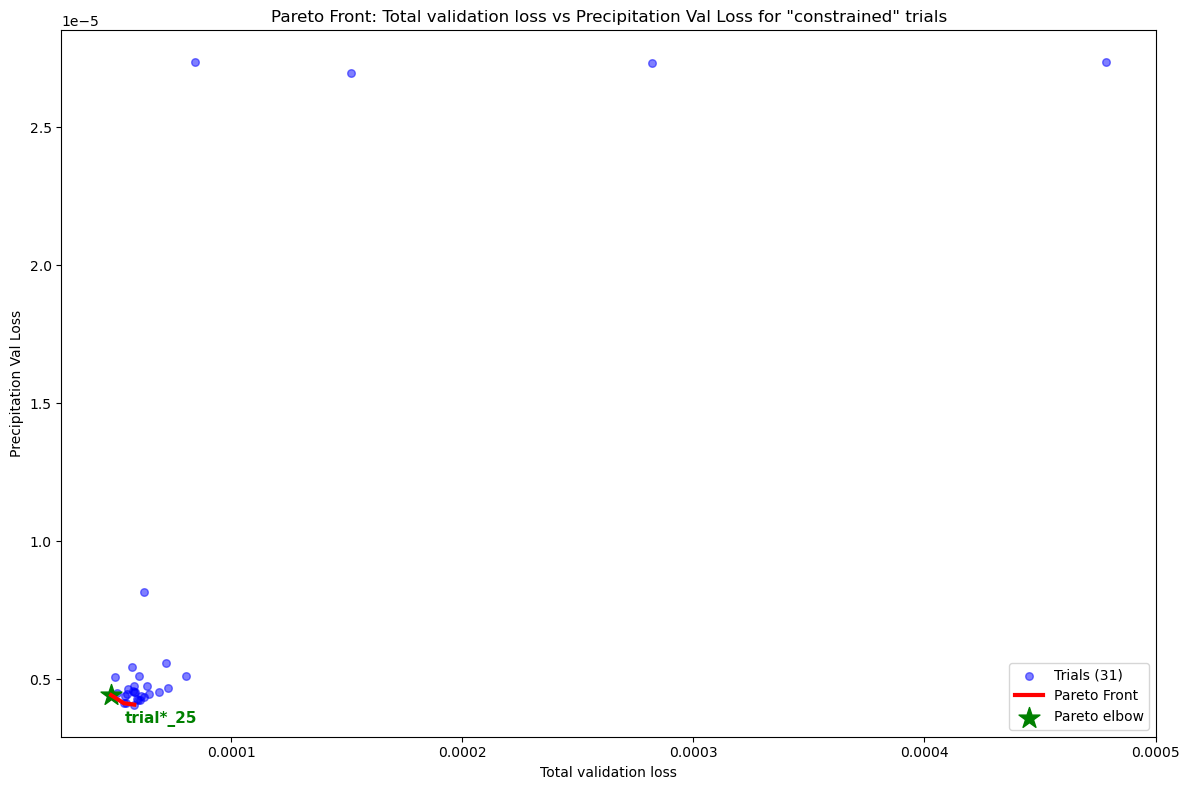

In [10]:
y = trials_data['RhiresD/val'].values
x = trials_data['loss/val'].values

def pareto_front_2d(x, y):
    # Sort by x (first objective)
    idx_sorted = np.argsort(x)
    pareto_idx = []
    min_y = np.inf
    for idx in idx_sorted:
        if y[idx] < min_y:
            pareto_idx.append(idx)
            min_y = y[idx]
    pareto_points = np.array(list(zip(x[pareto_idx], y[pareto_idx])))
    return pareto_points, np.array(pareto_idx)

pareto_points, pareto_idx = pareto_front_2d(x, y)

plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Trials (31)', color='blue', alpha=0.5, s=30)
plt.plot(pareto_points[:,0], pareto_points[:,1], color='red', linewidth=3, label='Pareto Front')

# Annotate Pareto "elbow" (closest to origin)
pareto_distances = np.sqrt(pareto_points[:,0]**2 + pareto_points[:,1]**2)
elbow_idx = np.argmin(pareto_distances)
elbow_x, elbow_y = pareto_points[elbow_idx]
elbow_trial_idx = pareto_idx[elbow_idx]
elbow_trial_name = trials_data.iloc[elbow_trial_idx]['Name']
plt.scatter(elbow_x, elbow_y, marker='*', s=250, color='green', label='Pareto elbow')
plt.annotate(f'{elbow_trial_name}', (elbow_x, elbow_y),
             textcoords="offset points", xytext=(10,-20), ha='left', color='green', fontsize=11, fontweight='bold')

plt.xlabel('Total validation loss')
plt.ylabel('Precipitation Val Loss')
plt.title('Pareto Front: Total validation loss vs Precipitation Val Loss for "constrained" trials')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig('pareto_front_plot.png', dpi=500, bbox_inches='tight')